<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#学习笔记" data-toc-modified-id="学习笔记-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>学习笔记</a></span></li><li><span><a href="#备注" data-toc-modified-id="备注-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>备注</a></span></li><li><span><a href="#准备数据" data-toc-modified-id="准备数据-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>准备数据</a></span></li><li><span><a href="#sigmoid函数" data-toc-modified-id="sigmoid函数-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>sigmoid函数</a></span></li><li><span><a href="#cost-function(代价函数)" data-toc-modified-id="cost-function(代价函数)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>cost function(代价函数)</a></span></li><li><span><a href="#gradient-descent(梯度下降算法)" data-toc-modified-id="gradient-descent(梯度下降算法)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>gradient descent(梯度下降算法)</a></span></li><li><span><a href="#似合参数" data-toc-modified-id="似合参数-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>似合参数</a></span></li><li><span><a href="#用训练集预测和验证" data-toc-modified-id="用训练集预测和验证-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>用训练集预测和验证</a></span></li><li><span><a href="#寻找决策边界" data-toc-modified-id="寻找决策边界-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>寻找决策边界</a></span></li><li><span><a href="#正则化逻辑回归" data-toc-modified-id="正则化逻辑回归-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>正则化逻辑回归</a></span></li><li><span><a href="#regularized-cost(正则化代价函数)" data-toc-modified-id="regularized-cost(正则化代价函数)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>regularized cost(正则化代价函数)</a></span></li><li><span><a href="#regularized-gradient(正则化梯度)" data-toc-modified-id="regularized-gradient(正则化梯度)-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>regularized gradient(正则化梯度)</a></span></li></ul></div>

# 学习笔记

Logistic regression cost function

$$
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}{Cost(h_\theta(x^{(i)}),y^{(i)})}
$$

其中的$h_\theta(x)对应的公式为$

$$
h_\theta(x) = \frac{1}{1+e^{{-\theta^T}X}}
$$

其中$Cost(h_\theta(x),y)$展开为

$$
\
Cost(h_\theta(x),y) =  \left\{
    \begin{array}{lr}
     -log(h_\theta(x)) & \text {if y = 1} \\
     -log(1-h_\theta(x)) & \text {if y = 0}
    \end{array}
\right.
\
$$

*注意这里y的取值为0或1,不存在其他情况*

为了方便推导出梯度下降函数,这里对cost函数进行变化整理成一行可以表达的如下

$$
Cost(h_\theta(x),y) = -ylog(h_\theta(x)) - (1-y)log(1-h_\theta(x))
$$

*上边的公式可以分别将$y=1$和$y=0$代入进行验证:*  

$y=1$时公式第二部分由于$1-y=0$而消失,只剩下前半部分与之前的公式$y=1$时相符

$y=0$时公式第一部分由于$y=0$而消失,只剩下后半部分,与之前的公式$y=0$时相符

经过上边的推导后逻辑回归的代价函数为
$$
J(\theta) = -\frac{1}{m}[\sum_{i=1}^{m}{y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))}]
$$

梯度下降函数其实就是对代价函数(cost function)进行求导数并循环更新,对上边的$J(\theta)$进行求导并代入梯度下降公式后得到$min_\theta{J(\theta)}$的梯度下降函数如下

$$
\theta_j := \theta_j - \alpha \sum_{i=1}^{m}{(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}}
$$

# 备注
运行环境：python 3.6  
现在我知道我应该考虑列向量，而Tensorflow对数据的形状非常挑剔。 但是在numpy中，正常的一维ndarray已经被表示为列向量。 如果我重新塑造$\mathbb{R}^n$ 为 $\mathbb{R}^{n\times1}$，它不再是列向量了，而是是1列的矩阵,那使用scipy会有麻烦。
*所以我们应该把TensorFlow的数据视为特殊情况。 我们继续使用numpy的惯例。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report # 这个包是评价报告用的

# 准备数据

In [2]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


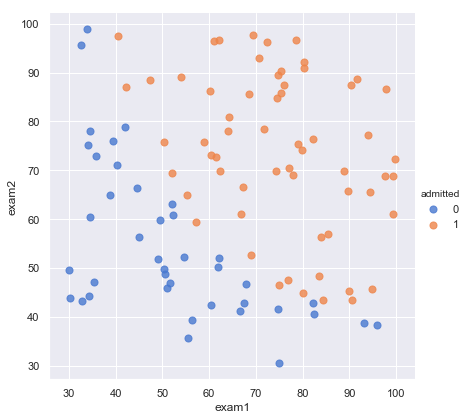

In [4]:
sns.set(context="notebook", style="darkgrid", palette="muted", color_codes=True)
#sns.set(context="notebook", style="darkgrid", palette=sns.color_palette("RdBu", 2))
sns.lmplot('exam1', 'exam2', hue='admitted', data=data, height=6, fit_reg=False, scatter_kws={"s":50})
plt.show()

In [5]:
def get_X(df):# 读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    ones = pd.DataFrame({'ones':np.ones(len(df))}) # ones 为m行1列的dataframe
    data = pd.concat([ones, df], axis=1) # 根据列合并数据
    #print(data)
    return data.iloc[:, :-1].as_matrix() # 返回的一个ndarray,不是矩阵

def get_y(df): # 读取标签
    return np.array(df.iloc[:, -1]) # 取df的最后一列

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean())/ column.std()) # 特征缩放b

In [6]:
X = get_X(data)
print(X.shape)

y = get_y(data)
print(y.shape)

(100, 3)
(100,)


/home/xiaofang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


# sigmoid函数

g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为：
$$
g(z) = \frac{1}{1 + e^{-z}}
$$

合起来,得到逻辑回归模型的假设函数为:

$$
h_\theta(x) = \frac{1}{1+e^{{-\theta^T}X}}
$$

In [7]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

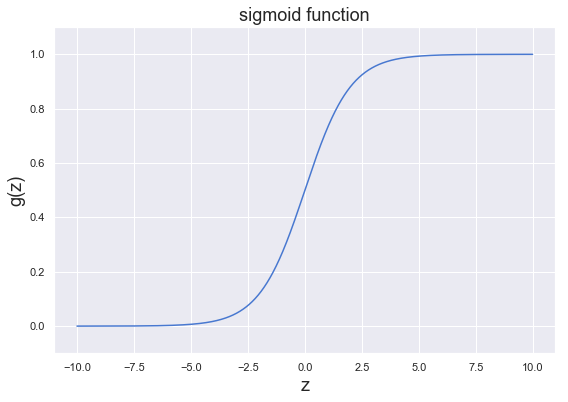

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(-10, 10, step = 0.01), sigmoid(np.arange(-10,10, step=0.01)))
ax.set_ylim(-0.1,1.1)
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

# cost function(代价函数)

* $max(\ell(\theta)) = min(-\ell(\theta))$
* choose  $−\ell(𝜃)$  as the cost function

$J(\theta)$的推导见学习笔记部分,最终表示如下

$$
J(\theta) = -\frac{1}{m}[\sum_{i=1}^{m}{y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1-h_\theta(x^{(i)}))}]
$$

In [9]:
theta = theta = np.zeros(3)
theta

array([0., 0., 0.])

In [10]:
def cost(theta, X, y):
    return -np.mean(y * np.log(sigmoid(X @ theta)) + (1-y) * np.log(1-sigmoid(X @ theta)))
# 由于使用矩阵(向量化)代替了常规的求和,故,这里只要求出m列矩阵的平均值即可
# X @ theta与X.dot(theta)等价,做数组的点积运算(理解就是矩阵的乘法,但是numpy库中关于dot和multiply又有不同,此处不理解??)

1. 同线性代数中矩阵乘法的定义： np.dot()
np.dot(A, B)：对于二维矩阵，计算真正意义上的矩阵乘积，同线性代数中矩阵乘法的定义。对于一维矩阵，计算两者的内积。

2. 对应元素相乘 element-wise product: np.multiply(), 或 *
在Python中，实现对应元素相乘，有2种方式，一个是np.multiply()，另外一个是*。

[参考链接](https://blog.csdn.net/u012609509/article/details/70230204)

In [11]:
cost(theta, X, y)

0.6931471805599453

# gradient descent(梯度下降算法)

* 使用批量梯度下降算法(batch gradient descent)
* 转化为向量化计算:

$$
\frac{1}{m}X^T(Sigmoid(X\theta) - y)
$$

* 对$J(\theta)$求导后得到:

$$
\frac{\partial{J(\theta)}}{\partial\theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

In [12]:
def gradient(theta, X, y):
    return (1/(len(X)) *X.T @ (sigmoid(X @ theta) - y))

In [13]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

# 似合参数
* 使用scipy.optimize.minimize去寻找参数

In [14]:
import scipy.optimize as opt

In [15]:
res = opt.minimize(fun=cost, x0=theta,args=(X,y), method='Newton-CG', jac=gradient)

In [16]:
print(res)

     fun: 0.203497708881501
     jac: array([-8.26207510e-06, -3.70033535e-04, -3.97954680e-04])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 29
    njev: 254
  status: 0
 success: True
       x: array([-25.16833701,   0.20628773,   0.20152827])


# 用训练集预测和验证

In [17]:
def predict(x, theta):
    prob = sigmoid(X @ theta)
    return (prob > 0.5).astype(int)

In [18]:
final_theta = res.x
y_pred = predict(X, final_theta)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



# 寻找决策边界
http://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier

$X \times \theta = 0$ (this is the line)

In [19]:
print(res.x) # the final theta

[-25.16833701   0.20628773   0.20152827]


In [20]:
coef = -(res.x/res.x[2]) # find the equation
print(coef)
x = np.arange(130, step = 0.1)
y = coef[0] +coef[1] * x
print("x",x)
print("y",y)

[124.88737673  -1.02361684  -1.        ]
x [0.000e+00 1.000e-01 2.000e-01 ... 1.297e+02 1.298e+02 1.299e+02]
y [124.88737673 124.78501505 124.68265336 ...  -7.8757277   -7.97808938
  -8.08045107]


In [21]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


> you know the intercept would be around 125 for both x and y

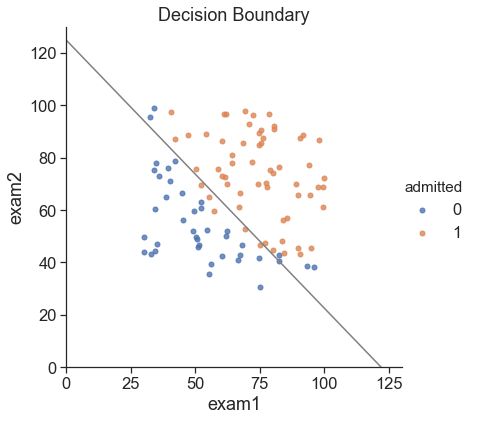

In [22]:
sns.set(context="notebook", style="ticks", font_scale=1.5)
sns.lmplot('exam1', 'exam2', hue='admitted', data=data,
          height=6,
          fit_reg=False,
          scatter_kws={"s": 25})
plt.plot(x,y,'grey')
plt.xlim(0,130)
plt.ylim(0,130)
plt.title('Decision Boundary')
plt.show()

# 正则化逻辑回归

In [23]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


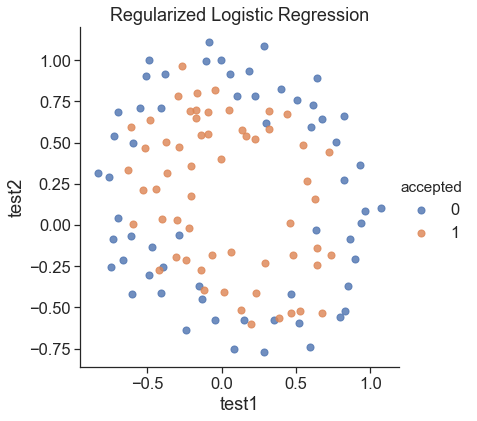

In [24]:
sns.set(context="notebook", style="ticks", font_scale=1.5)
sns.lmplot('test1', 'test2', hue='accepted', data=df,
          height=6,
          fit_reg=False,
          scatter_kws={"s": 50})
plt.title("Regularized Logistic Regression")
plt.show()

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```

$$
mapFeature(x) = 
\left[ \begin{array} {cccc}
1 \\
x_1 \\
x_2 \\
x_1^2 \\
x_1x_2 \\
x_2^2 \\
x_1^3 \\
\cdots \\
x_1x_2^5 \\
x_2^6
\end{array} \right]
$$

In [25]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {
    "f{}{}".format(i-p,p): np.power(x, i-p) * np.power(y,p)
        for i in np.arange(power+1)
        for p in np.arange(i+1)
    }
    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)

In [26]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [27]:
data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [28]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646562,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


# regularized cost(正则化代价函数)

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))]
+ \frac{\lambda}{2m} \sum_{j=1}^{m}\theta_j^2
$$

In [29]:
theta = np.zeros(data.shape[1])
X = feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X.shape)

y = get_y(df)
print(y.shape)

(118, 28)
(118,)


/home/xiaofang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [30]:
def regularized_cost(theta, X, y, l=1):
    theta_j1_to_n = theta[1:]
    regularized_term = (l / (2*len(X))) * np.power(theta_j1_to_n, 2).sum()
    return cost(theta, X, y) + regularized_term

In [31]:
regularized_cost(theta, X, y, l=1)

0.6931471805599454

this is the same as the not regularized cost because we init theta as zeros...
因为我们设置theta为0，所以这个正则化代价函数与代价函数的值相同

# regularized gradient(正则化梯度)

$$
\frac{\partial J(\theta)}{\partial \theta_j} = 
\left(
\frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})
\right) +
\frac {\lambda}{m} \theta_j
\text{       }
\text{    for j}\ge \text{1}
$$